In [45]:
from cslib import fetch_data
import time
import os
import seaborn as sns

# Data Investigation
## Business scenario

Originally launched with a subscription tiering approach, the new approach was to use an a la carte approach. This experiment was carried out mostly outside of the US and there are now a couple of years of data with a few thousand active users. **The data are transaction-level purchases across 38 different countries and are invoiced in batches**.

Management would like to switch to the new model. They would like to be able to have a service that at any point in time can predict the revenue for the following month. It should be able to predict revenue for a given country as well. The model should be limited to the **top ten** countries in terms of revenue.

The managers had previously been doing their own models but they lacked data science experience. They hope that the new models **reduce the amount of time taken** and produce **more accurate predictions**. An accurate model will be used to help stabilize staffing and budget projections.

## Articulate testable hypotheses

A hypothesis that is testable is that current subscriber's future revenue can be predicted according to what level of subscription they have and their likelihood to be retained.

## Ideal data to address business opportunity

Ideally we would like revenue data at a user level alongside a feature matrix describing the user's behaviours, length of subscription, average time on the platform per week etc. With this data over ideally 5-10 years it would be possible to estimate how likely they would be to remain on the subscription in order to estimate revenue. Another key is new customers which would require data on leads data going back 5-10 years. With this data and user behaviour information it would be possible to estimate how these leads project into future revenue.

## Extract relevant data from multiple sources

In [18]:
# Setup the initial variables
run_start = time.time() 
data_dir = os.path.join("..","cs-train")
print("...fetching data")

# Fetching data may take a few seconds
df = fetch_data(data_dir)

# Calculate time taken and display
m, s = divmod(time.time()-run_start,60)
h, m = divmod(m, 60)
print("load time:", "%d:%02d:%02d"%(h, m, s))

# Print the data
df.head()

...fetching data
load time: 0:00:08


,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,17998.0,28,489562,11,5.95,84656,1,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


## Investigate the relationship

Looking at the relevant data, the target and the business metric in order to gain an initial understanding of the problem. The data is loaded in as a dataframe and the target is monthly revenue which can be calculated and plotted and compared to the business metric.

In [35]:
# Convert types to integer
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

In [37]:
# Add a temporary date column which gives a unique value for each month and year
df['date'] = df.apply(lambda row: row.year + (row.month/12), axis=1)

In [48]:
# Get the monthly revenue data
revenue_global = df.groupby(['date']).sum()

,customer_id,day,month,price,times_viewed,year
date,,,,,,
2017.916667,108941428.0,275337,104522,41152.750,44972,19165534
2018.000000,382211629.0,336979,428712,157155.010,165047,72059342
2018.083333,387804128.0,606349,35682,183680.394,176494,72006276
2018.166667,372719104.0,460331,59746,116345.374,157529,60283714
2018.250000,476918791.0,609380,115854,257428.441,201318,77931124


<AxesSubplot:xlabel='date', ylabel='price'>

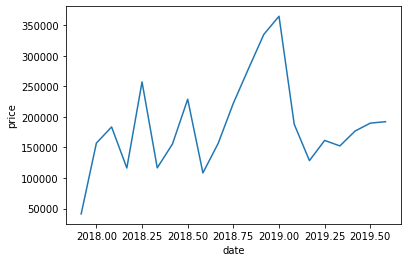

In [50]:
# Plot the global revenue
sns.lineplot(data=revenue_global, x='date', y='price')

In [58]:
# Break this down by country
revenue_by_country = df.groupby(['date', 'country']).sum()
revenue_by_country = revenue_by_country.reset_index()

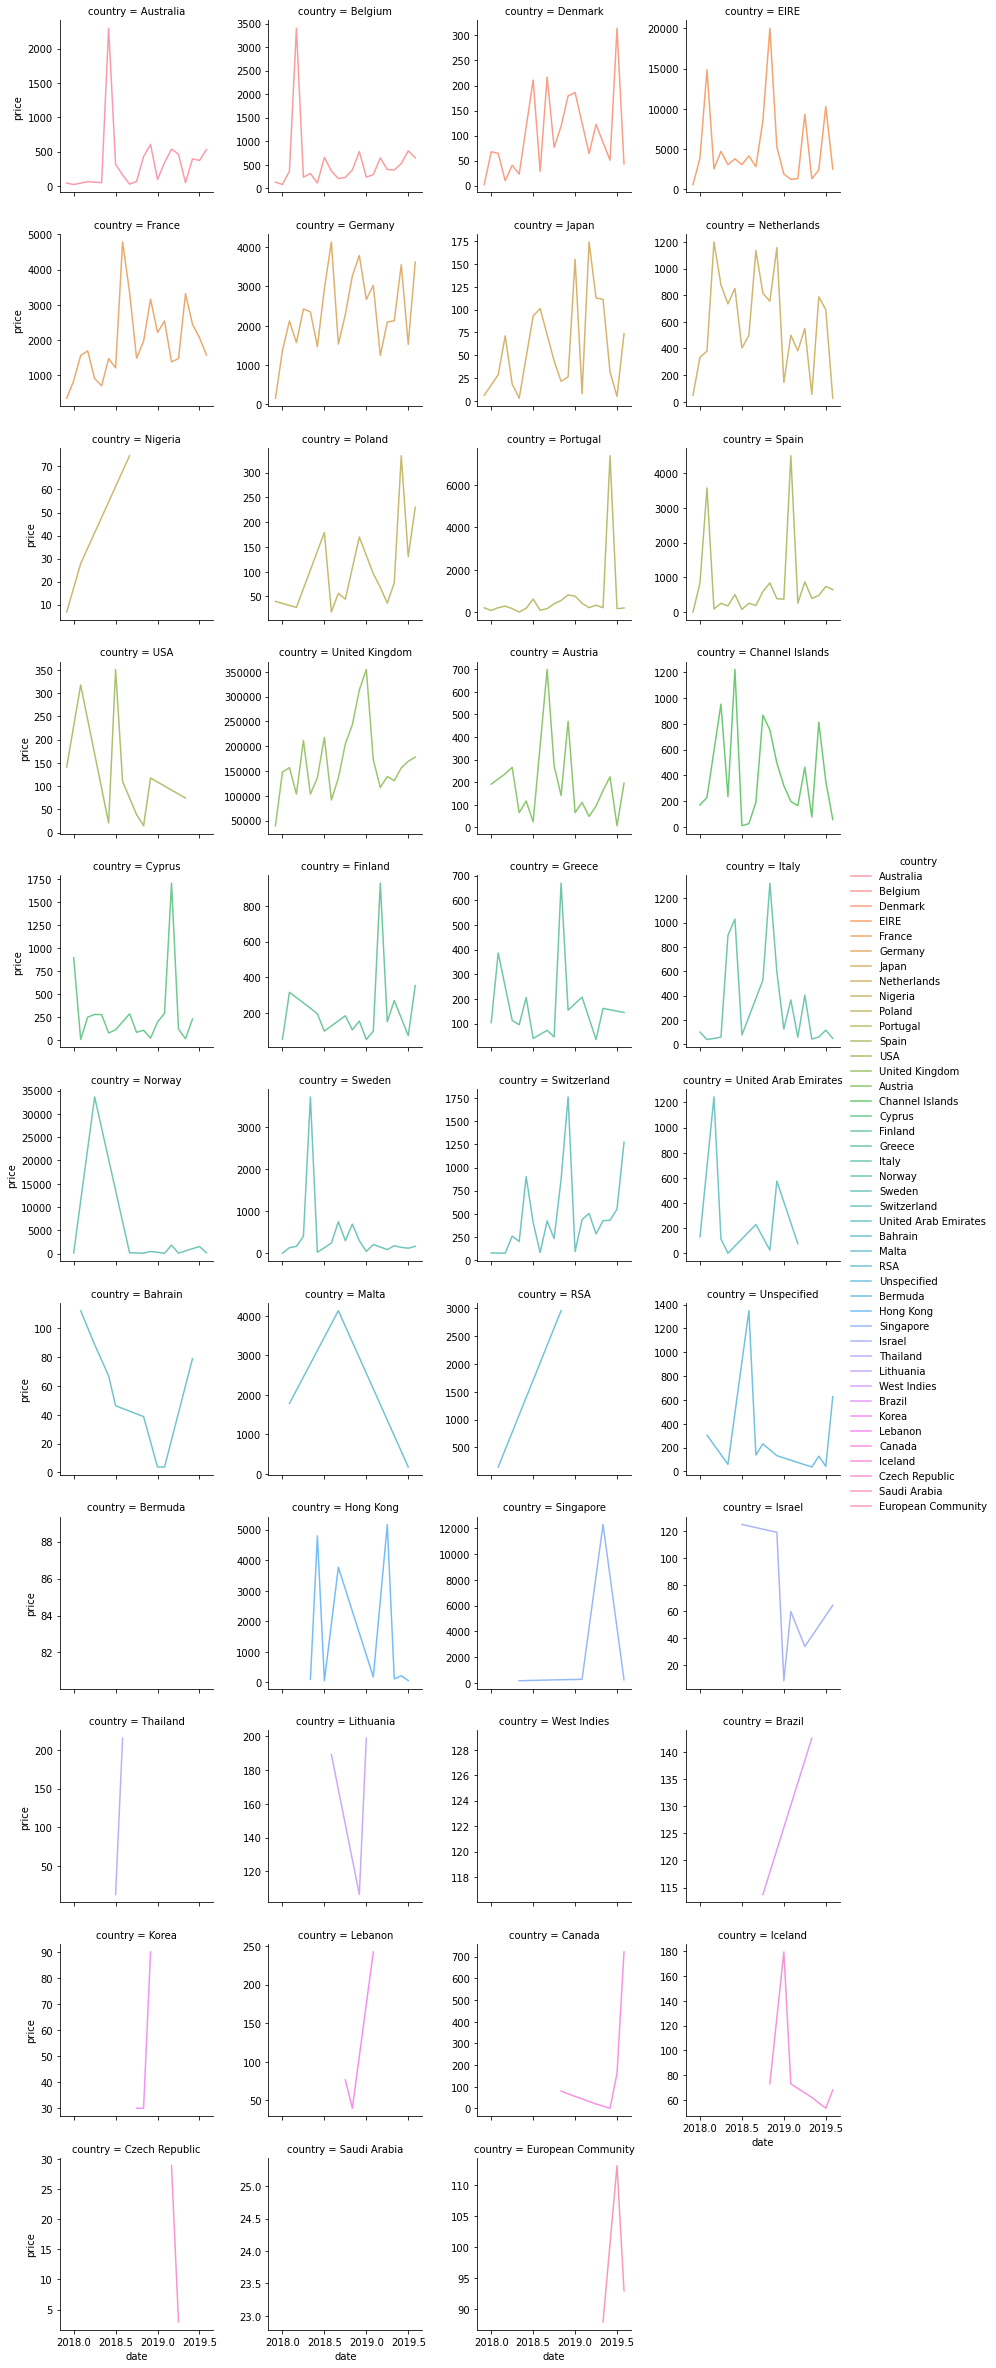

In [66]:
# Plot this on a FacetGrid
g = sns.FacetGrid(revenue_by_country, col="country", hue="country", col_wrap=4, sharey=False)
g.map(sns.lineplot, "date", "price", alpha=.7)
g.add_legend()